<center>
    <h1>CYPRUS INTERNATIONAL UNIVERSITY</h1>
    <h2><b>School of Applied Science</b></h2>
    <h3>Department of <span style="color:black;">Data Science</span></h3>
    <br>
    <img src="https://moodle.ciu.edu.tr/pluginfile.php/1/core_admin/logocompact/300x300/1728932360/ciulogo.png", width="150",height="150">
    <br><br>
    <h3><b>Name & Surname :</b></h3><span style="color:blue;"> TIMOTHEE KABONGO NKWAR</span></h3>
    <h3><b>INSTRUCTOR :</b> <span style="color:blue;">Dr. Yasemin Bay</span></h3>
    <h3><b>COURSE NAME :</b> <span style="color:blue;">DASC311 Statistical Machine Learning</span></h3>
    <br>
    <h3><b>Student ID:</b><span style="color:blue;">22205731</span> <span style="color:red;"></span></h3>
</center>


In [60]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
Male_or_female_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
# data (as pandas dataframes) 
data = Male_or_female_based_on_eating_habits_and_physical_condition.data.features 

### Additional Information

This dataset includes data for the estimation of obesity levels in individuals from the countries of **Mexico**, **Peru**, and **Colombia**, based on their eating habits and physical condition.

The data contains **17 attributes** and **2111 records**, and the records are labeled with the class variable **NObesity** (Obesity Level), which allows classification of the data using the following categories:
- **Insufficient Weight**
- **Normal Weight**
- **Overweight Level I**
- **Overweight Level II**
- **Obesity Type I**
- **Obesity Type II**
- **Obesity Type III**

**77%** of the data was generated synthetically using the **Weka tool** and the **SMOTE filter**, while **23%** of the data was collected directly from users through a web platform.

### Link to the dataset:
[Estimation of Obesity Levels Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition-)


In [61]:
# check the size of the dataset
data.shape

(2111, 16)

### Importing the libraries

In [ ]:
# alll the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [63]:
# load the data
data 
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


## DATA PREPROCESSING AND EDA

In [64]:
# Convert the gender into a boolean
data_encoded = pd.get_dummies(data, columns=["Gender", "CAEC", "CALC", "MTRANS",
                                             "family_history_with_overweight","SMOKE"],
                              drop_first=True,dtype=int)

# delete some useless columns
data_encoded.drop( columns =['family_history_with_overweight_yes','FAVC','SCC','SMOKE_yes',
                             'CALC_no','CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'MTRANS_Motorbike',
                             'MTRANS_Public_Transportation', 'MTRANS_Walking','CAEC_Frequently','CALC_Sometimes',  
                             'MTRANS_Bike'], axis=1, inplace=True)

# rename the colonne Gender_male tu Gender
data_encoded.rename(columns={'Gender_Male':"Gender"}, inplace=True)
data_encoded.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [65]:

fig = px.scatter(data_encoded,x="Age",y="Weight",color="Gender")
fig.update_layout(
    title="Distribution of gender over Age and Weight",
    xaxis_title="Age",
    yaxis_title="Weight",
    template="plotly_dark",
    height=400,
    width=800
)
fig.show()



In [66]:



gender_counts = data_encoded["Gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]


fig = px.bar(
    gender_counts,
    x="Count",
    y="Gender",
    orientation="h",
    template="plotly_dark",
    width=800,
)
fig.update_layout(
    height=300,     
    bargap=0.5    
)
fig.show()


<Axes: ylabel='Height'>

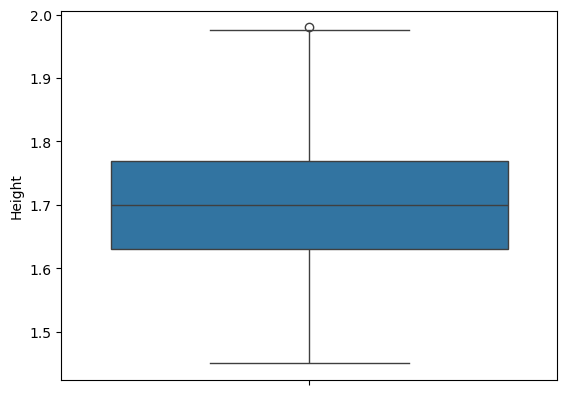

In [67]:
sns.boxplot(data_encoded["Height"])

<Axes: ylabel='Weight'>

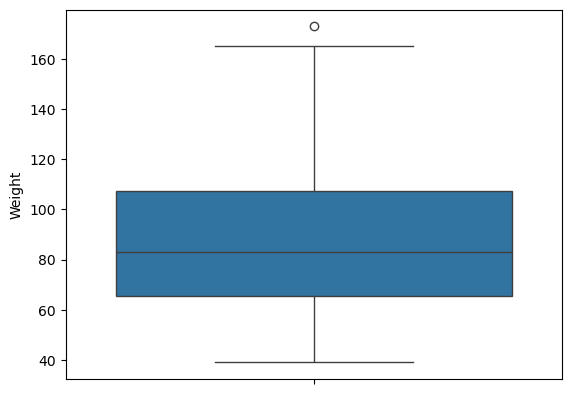

In [68]:
sns.boxplot(data_encoded["Weight"])

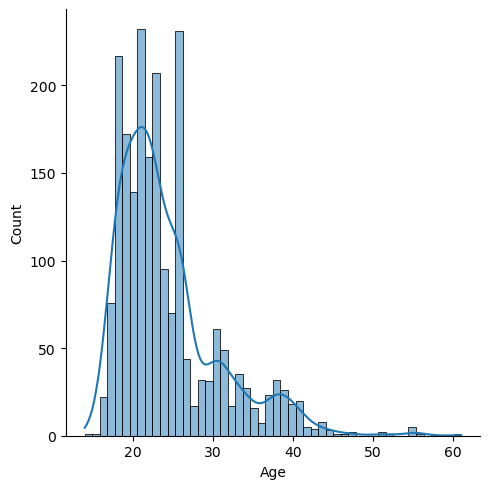

In [69]:
sns.displot(data_encoded["Age"],kde=True)

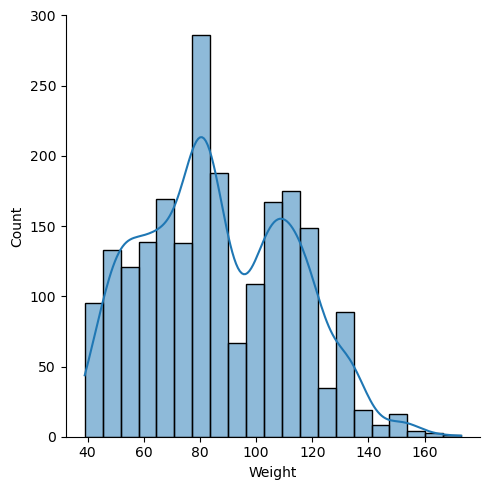

In [70]:

sns.displot(data_encoded["Weight"],kde=True)

In [71]:

data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [72]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2111 non-null   float64
 1   Height  2111 non-null   float64
 2   Weight  2111 non-null   float64
 3   FCVC    2111 non-null   float64
 4   NCP     2111 non-null   float64
 5   CH2O    2111 non-null   float64
 6   FAF     2111 non-null   float64
 7   TUE     2111 non-null   float64
 8   Gender  2111 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 148.6 KB


In [73]:
# Statistics for the data
data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00


In [74]:
# there are no null values
data_encoded.isnull().sum()

Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
Gender    0
dtype: int64

In [75]:
data_encoded.duplicated()
data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [76]:

#FAF : Physical activity frequency
#TUE : Time using technology devices
#FCVC : Frequency of consumption of vegetables
#NCP : Number of main meals
#CH2O : Consumption of water daily

# 1 LOGISTIC REGRESSION



**Logistic Regression** is a supervised learning algorithm used for binary classification (and extended to multiclass with variations). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and classifies data into discrete categories.

It works by estimating the probability of an event occurring based on the input features, using the **logistic (sigmoid)** function to output a value between 0 and 1. The threshold (usually 0.5) is then used to classify data into one of two classes.

### Key Characteristics:
- **Supervised learning**: It requires labeled data for training.
- **Binary classification**: Often used for problems where the output is binary (e.g., spam vs. not spam).
- **Multiclass extension**: Can be extended to handle multiclass classification using methods like One-vs-Rest (OvR) or Softmax regression.
- **Output**: Predicts probabilities that are mapped to class labels using a threshold (e.g., 0.5 for binary classification).


### Data Preprocessing

In [77]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns = ['Gender'], axis=1).values
y = data_encoded["Gender"]
'''
#why scaling is important?
# because the range of values of raw data varies widely
# so, the range of all features should be standardized so that each feature contributes approximately proportionately 
to the final distance

'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data_encoded.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(data_encoded_scaled, y, test_size = 0.2, random_state = 0)
data_encoded_scaled.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [78]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
# what is X_train ?  X-train is the training data
# what is X_test ? X-test is the test data 
# what is y_train ? y-train is the training data and it is the target variable
# what is y_test ? y-test is the test data and it is the target variable


((2111, 8), (2111,), (1688, 8), (423, 8), (1688,), (423,))

### MODEL SELECTION

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
# why solver and max_iterations? solver is the algorithm to use in the optimization problem and max_iterations is the maximum number of iterations taken for the solvers to converge
log_reg = LogisticRegression(solver='liblinear',max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [80]:
# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

In [81]:

y_pred_log[0]

np.int64(1)

## MODEL EVALUATION

In [82]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_log))

confusion_matrix = confusion_matrix(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       231
           1       0.78      0.79      0.79       192

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



In [83]:
# 80% of accuracy ,which is good
accuracy_score = accuracy_score(y_test, y_pred_log)
print("accuracy_score : ",accuracy_score)

accuracy_score :  0.8037825059101655


In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logcm =confusion_matrix(y_test, y_pred_log)
logcm

array([[188,  43],
       [ 40, 152]])

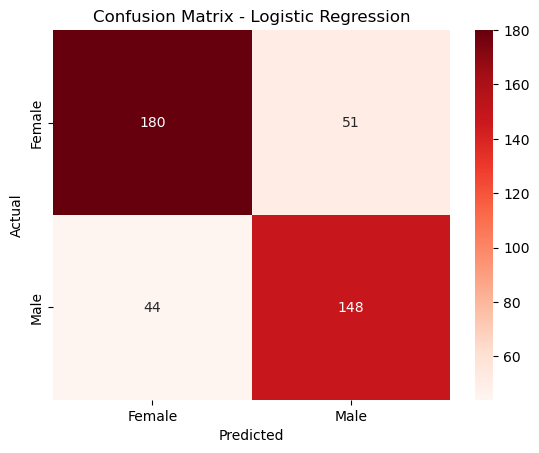

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [86]:
# Save the model
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

### TEST THE MODEL ON UNSEEN DATA

In [87]:
# Load the model
log_reg_model = joblib.load("logistic_regression_model.pkl")   
#we can see the type of the model
type(log_reg_model)

sklearn.linear_model._logistic.LogisticRegression

In [88]:
#let's predict the new data 
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_encoded.columns[:-1])

In [89]:
#here the new data is scaled
new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.684523,-0.017981,-0.633419,1.088342,2.975328,-3.276737,2.33975,5.489861


In [90]:
#let's predict the new data
prediction1 = log_reg_model.predict(new)
if prediction1 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is female!


In [91]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_encoded.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.565409,12.846138,-0.251521,1.088342,2.975328,-3.276737,2.33975,127.043843


In [92]:
#let's predict the new data2
prediction2 = log_reg_model.predict(new2)
if prediction2 == 0:
     print("The gender is female !")
else:
     print("The gender is male !")

The gender is male !


# 2 Random Forest

### Random Forest

**Random Forest** is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It builds a collection of decision trees during training and outputs the majority vote (for classification) or average (for regression) of the individual trees' predictions.

Random Forest overcomes the limitation of individual decision trees, which can easily overfit the data, by averaging multiple trees to reduce variance and improve generalization.

### Key Characteristics:
- **Ensemble learning**: Combines multiple decision trees to create a stronger model.
- **Bootstrapping**: Uses random sampling with replacement (bootstrap) to build different training subsets for each tree.
- **Feature randomness**: During tree construction, each tree is trained on a random subset of features, further promoting diversity among trees.
- **Robustness**: Handles overfitting better than a single decision tree by averaging multiple trees' results.
- **Versatility**: Works well for both classification and regression tasks.

### Strengths:
- **High accuracy**: Due to the averaging of many decision trees, Random Forest generally provides better accuracy than a single decision tree.
- **Robust to overfitting**: While individual trees may over


In [93]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

### Splitting Steps

In [94]:
X = data_encoded.drop(columns=['Gender'], axis=1).values
y = data_encoded['Gender']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data only and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [95]:
# Convert scaled data back to DataFrame (optional, for inspection)
columns = data_encoded.columns[:-1]  # Exclude 'Gender'
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns)
X_test_scaled_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.990213,2.199156,1.618594,0.156197,0.401761,-1.066293,0.148540,-0.803394
1,-1.001942,-0.363297,0.152829,-2.653712,0.401761,-1.659272,-1.192593,0.562369
2,0.762186,0.740336,0.002170,-1.535890,1.193028,-1.210528,0.570462,-0.478236
3,-0.952185,0.441643,1.784290,1.098968,0.401761,1.486955,0.608621,-0.056526
4,-0.879998,0.452823,1.793699,1.098968,0.401761,1.397730,0.525832,-0.052337


In [96]:
X_train_scaled_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,2.184846,-1.557814,-0.281859,-0.777372,0.401761,-1.209898,-1.192593,-1.089561
1,2.535554,0.194567,0.856293,-0.248314,1.386978,-1.659272,0.367097,-1.089561
2,2.422106,-1.398289,-0.265572,-0.642985,0.373509,-0.893405,-1.192593,-1.089561
3,-0.173598,0.605672,0.414652,-0.777372,0.401761,1.593224,1.655864,2.178027
4,-0.282730,0.195259,-1.346904,0.467431,0.401761,-1.592039,-0.261362,1.209840


## Training the model

In [97]:
# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## MODEL EVALUATION

In [98]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
# Assuming y_pred was generated from rf_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score : {accuracy:.4f}")


Accuracy score : 0.9125


In [ ]:

# Calculate and print confusion matrix
rf_modelfcm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[180  51]
 [ 44 148]]


In [100]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       231
           1       0.91      0.90      0.90       192

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



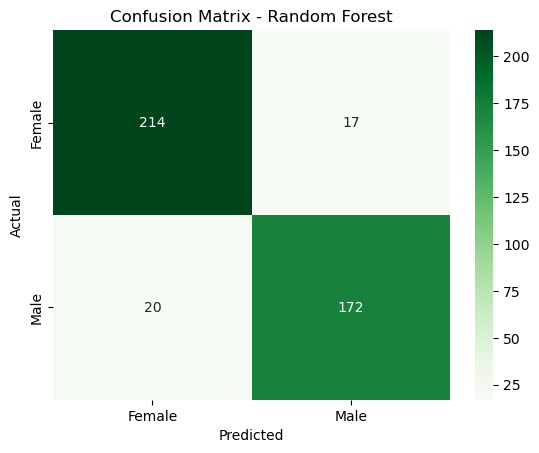

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Rfcm, annot=True, fmt='d', cmap='Greens', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### TEST THE MODEL ON UNSEEN DATA

### Save the model

In [102]:
# Save the model
import joblib
joblib.dump(rf_model, "Random_Forest_model.pkl")

['Random_Forest_model.pkl']

### Load the model

In [103]:
# Load the model
Random_Forest_model = joblib.load("Random_Forest_model.pkl")   

Random_Forest_model

RandomForestClassifier(random_state=42)

### TEST THE MODEL ON UNSEEN DATA

                         1 example

In [104]:
#let's predict the new data using random forest
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_encoded.columns[:-1])

In [105]:
#let's predict the new data
prediction1 = Random_Forest_model.predict(new)
if prediction1 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is female!


                         2 example

In [106]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_encoded.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.594933,12.732607,-0.268889,1.098968,2.959509,-3.294702,2.324132,127.760962


In [107]:
#let's predict the new data
prediction2 = Random_Forest_model.predict(new2)
if prediction2 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is male !


# 3 NAIVE BAYES

### Naive Bayes

**Naive Bayes** is a probabilistic classification algorithm based on applying **Bayes' Theorem** with strong (naive) independence assumptions. It is particularly suited for large datasets and works well with categorical input features.

Naive Bayes assumes that the features are independent given the class label, which simplifies the computation of the likelihood. Despite this simplifying assumption, Naive Bayes often performs surprisingly well in practice, especially for text classification problems.

### Key Characteristics:
- **Probabilistic approach**: Estimates the probability of each class based on the input features.
- **Naive assumption**: Assumes that the features are conditionally independent given the class label.
- **Fast and scalable**: Ideal for large datasets, particularly in text classification tasks (e.g., spam detection).
- **Works well with categorical data**: Often used with datasets where features


### Splitting dataset

In [108]:
# Import necessary libraries as usually
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

In [109]:
X = data_encoded.drop(columns=['Gender'], axis=1).values
y = data_encoded['Gender']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data only and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Training the model

In [110]:
# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_nb[0]

np.int64(1)

## MODEL EVALUATION

In [111]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7754


In [112]:
# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[180  51]
 [ 44 148]]


In [113]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       231
           1       0.74      0.77      0.76       192

    accuracy                           0.78       423
   macro avg       0.77      0.78      0.77       423
weighted avg       0.78      0.78      0.78       423



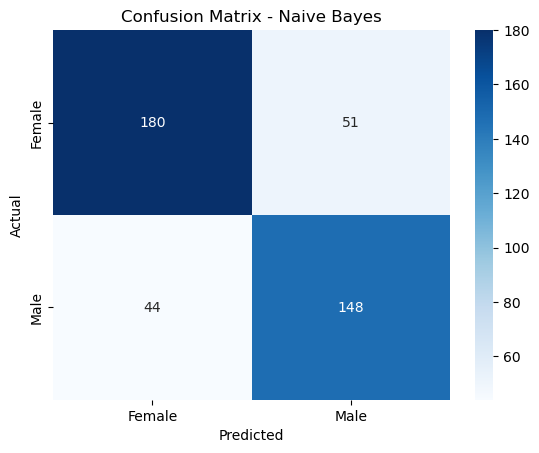

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### TEST THE MODEL ON UNSEEN DATA

### save the model

In [115]:
# Save the model
import joblib
joblib.dump(nb_model, "Naive_Bayes_model.pkl")

['Naive_Bayes_model.pkl']

### Load the model

In [116]:
# Load the model
Naive_Bayes_model = joblib.load("Naive_Bayes_model.pkl")
Naive_Bayes_model

GaussianNB()

                         1 example

In [117]:
#let's predict the new data using random forest
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_encoded.columns[:-1])

In [118]:
#let's predict the new data
prediction1 = Naive_Bayes_model.predict(new)
if prediction1 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is male !


                         2 example

In [119]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_encoded.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.594933,12.732607,-0.268889,1.098968,2.959509,-3.294702,2.324132,127.760962


In [120]:
#let's predict the new data
prediction2 = Naive_Bayes_model.predict(new2)
if prediction2 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is male !


# Model Performance Evaluation for Gender Prediction

## Context
I trained 3 classifications models to predict gender (`Male`/`Female`) from an encoded dataset:
- **Logistic Regression**: A linear model that estimates the probability of a binary outcome using the logistic (sigmoid) function
- **Random Forest Classifier**: An ensemble model with 100 decision trees.
- **Gaussian Naive Bayes**: A probabilistic model assuming feature independence.

The data was split into 80% training and 20% test sets (`test_size=0.2`, `random_state=0`). Features were standardized using `StandardScaler` to ensure comparable scales.

## Evaluation Metrics
Performance is evaluated using three metrics:
- **Accuracy**: Proportion of correct predictions.
- **Confusion Matrix**: Distribution of correct and incorrect predictions.
- **Classification Report**: Precision, recall, and F1-score per class.

### 1. Logistic Regression

#### Accuracy
- **Accuracy**: 0.8500 (85% of predictions are correct).

![Confusion Matrix](conf_matrix_log.png)  

- **Interpretation**:
---
* ✅ **True Positives (TP)** = 188
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 152
  Predicted `Female`, and it was actually `Female`.

* ❌ **False Positives (FP)** = 40
  Predicted `Male`, but it was actually `Female`.

* ❌ **False Negatives (FN)** = 43
  Predicted `Female`, but it was actually `Male`.
---

#### Classification Report for the logistic regression
  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          82%            |            81%                  |        82%            |
  |   1    |          78%            |            79%                  |        79%            |

### 1. Random Forest Classifier

#### Accuracy
- **Accuracy**: 0.9125 ( 91% of predictions are correct).

  ![ Random Forest](conf_matrix_rf.png)  

- **Interpretation**:
---
* ✅ **True Positives (TP)** = 214
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 172
  Predicted `Female`, and it was actually `Female`.

* ❌ **False Positives (FP)** = 20
  Predicted `Male`, but it was actually `Female`.

* ❌ **False Negatives (FN)** = 17
  Predicted `Female`, but it was actually `Male`.
---

#### Classification Report for the Random Forest Classifier

  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          91%            |            93%                  |        92%            |
  |   1    |          91%            |            90%                  |        90%            |

### 1. Naive bayes

#### Accuracy
- **Accuracy**: 0.78 (78% of predictions are correct).

![Naive Bayes](conf_matrix_nb.png)  

- **Interpretation**:

---
* ✅ **True Positives (TP)** = 180
  Predicted `Male`, and it was actually `Male`.

* ✅ **True Negatives (TN)** = 148
  Predicted `Female`, and it was actually `Female`.

* ❌ **False Positives (FP)** = 44
  Predicted `Male`, but it was actually `Female`.

* ❌ **False Negatives (FN)** = 51
  Predicted `Female`, but it was actually `Male`.
---

#### Classification Report for the naive bayes model
  | Classes|      Precision          |         Recall                  |   F1-score            |
  |--------|-------------------------|---------------------------------|-----------------------|
  |   0    |          80%            |            78%                  |        79%            |
  |   1    |          74%            |            77%                  |        76%            |
 

## Model Comparison
- **Logistic Regression**:
  - **Strengths**: Simple, fast to train, highly interpretable, performs well with linearly separable data
  - **Weaknesses**: Assumes a linear relationship between features and the log-odds, limited in handling complex or non-linear patterns.
- **Random Forest**:
  - **Strengths**: Higher accuracy , better F1-scores, robust to complex feature interactions.
  - **Weaknesses**: Slower to train, risk of overfitting if not tuned.
- **Naive Bayes**:
  - **Strengths**: Fast, simple, effective for data with relatively independent features.
  - **Weaknesses**: Assumes feature independence, which may limit performance if violated.




## Conclusion
The **Random Forest** model is the better choice for this problem, with an accuracy of 91% and higher F1-scores for both classes. It handles complex data 
The **Logistic Regression** model achieved **85% accuracy**, making it a solid and interpretable baseline. It's fast to train and works well when the data is linearly separable.
relationships more effectively. **Naive Bayes** remains competitive (78% accuracy) and is faster, making it suitable for quick prototyping or simpler datasets.

### Recommendations
1. **Optimization**: Tune Random Forest hyperparameters (e.g., `n_estimators`, `max_depth`) using `GridSearchCV` to improve performance.
3. **Cross-Validation**: Perform cross-validation to confirm performance robustness.


***Github : TIMOTHEE NKWAR***
 **Link to the code in github** <https://github.com/TimotheeNkwar/School_Project/tree/main/Machine%20Learning>